In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
# for preserving the model
import pickle

In [4]:
home = Path.cwd()
home

WindowsPath('C:/DataScience2023/Bangalore')

In [5]:
filename = home / 'Bengaluru_House_Data.csv'
filename

WindowsPath('C:/DataScience2023/Bangalore/Bengaluru_House_Data.csv')

In [6]:
[file.stem + file.suffix for file in home.iterdir() if str(file.stem).startswith('B')]

['Bengaluru_House_Data.csv']

In [7]:
df = pd.read_csv(filepath_or_buffer=filename)
print(df.shape)
df.head(3)
# price is total cost, not per_sqft_price

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [8]:
# The dataset is overflowing with duplicated data
print(df[df.duplicated()].shape)
df[df.duplicated()].head(3)

(529, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5


In [9]:
# Dropping duplicates
df.drop_duplicates(inplace=True)
print(df.shape)
df.head(3)

(12791, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [10]:
# Checking missing data
# more than a third of the data for the feature 'society' is missing, so it must go
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [11]:
df.drop(labels='society', axis=1, inplace=True)
print(df.shape)
df.head(3)

(12791, 8)


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


In [12]:
# data still missing
df.isna().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [13]:
# Dropping other insignificant features
df.drop(['balcony', 'area_type', 'availability', 'bath'], axis=1, inplace=True)
print(df.shape)
df.head(3)

(12791, 4)


,location,size,total_sqft,price
0,Electronic City Phase II,2 BHK,1056,39.07
1,Chikka Tirupathi,4 Bedroom,2600,120.00
2,Uttarahalli,3 BHK,1440,62.00


In [14]:
df.dropna(how='any', inplace=True)
print(df.shape)
df.head(3)

(12774, 4)


,location,size,total_sqft,price
0,Electronic City Phase II,2 BHK,1056,39.07
1,Chikka Tirupathi,4 Bedroom,2600,120.00
2,Uttarahalli,3 BHK,1440,62.00


In [15]:
# now no more data is missing
df.isna().sum()

location      0
size          0
total_sqft    0
price         0
dtype: int64

In [16]:
df['bhk'] = df['size'].str.split(expand=True)[0].astype('int')
df.head(3)

,location,size,total_sqft,price,bhk
0,Electronic City Phase II,2 BHK,1056,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,120.00,4
2,Uttarahalli,3 BHK,1440,62.00,3


In [17]:
# houses with BHK over 10 need to be dropped since they are outliers
print('houses with BHK over 10:   ', df[df['bhk'] > 10].index)
df[df['bhk'] > 10]

houses with BHK over 10:    Index([459, 1718, 1768, 3379, 3609, 3853, 4684, 4916, 6533, 7979, 9935, 11559], dtype='int64')


,location,size,total_sqft,price,bhk
459,1 Giri Nagar,11 BHK,5000,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,150.0,11
4684,Munnekollal,43 Bedroom,2400,660.0,43
4916,1Channasandra,14 BHK,1250,125.0,14
6533,Mysore Road,12 Bedroom,2232,300.0,12
7979,1 Immadihalli,11 BHK,6000,150.0,11


In [18]:
# dropping outliers
df.drop(index=df[df['bhk'] > 10].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(3)

,location,size,total_sqft,price,bhk
0,Electronic City Phase II,2 BHK,1056,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,120.00,4
2,Uttarahalli,3 BHK,1440,62.00,3


In [19]:
# drop the old feature 'size'
df.drop('size', axis=1, inplace=True)
df.head(3)

,location,total_sqft,price,bhk
0,Electronic City Phase II,1056,39.07,2
1,Chikka Tirupathi,2600,120.00,4
2,Uttarahalli,1440,62.00,3


In [20]:
# some total_sqft are in Meters & Acres
meters = df[df['total_sqft'].apply(lambda ch: any([1 for ch in ch if ch.isalpha()]))]
print(meters.shape)
meters

(46, 4)


,location,total_sqft,price,bhk
410,Kengeri,34.46Sq. Meter,18.50,1
645,Arekere,4125Perch,265.00,9
772,Basavanagara,1000Sq. Meter,93.00,1
869,Singapura Village,1100Sq. Yards,45.00,2
1015,Marathi Layout,5.31Acres,110.00,1
1082,Narasapura,30Acres,29.50,2
1392,Chamrajpet,716Sq. Meter,296.00,9
1701,Singena Agrahara,1500Sq. Meter,95.00,3
1731,Hosa Road,142.61Sq. Meter,115.00,3
1806,Sarjapur,1574Sq. Yards,76.00,3


In [21]:
# dropping the records where total_sqft are in Meters & Acres
df.drop(index=meters.index, inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head(3)

(12716, 4)


,location,total_sqft,price,bhk
0,Electronic City Phase II,1056,39.07,2
1,Chikka Tirupathi,2600,120.00,4
2,Uttarahalli,1440,62.00,3


In [22]:
# Some total_sqft are in the shape of ranges
df[df['total_sqft'].apply(lambda x: not x.isnumeric())]

,location,total_sqft,price,bhk
30,Yelahanka,2100 - 2850,186.000,4
44,Kanakpura Road,1330.74,91.790,2
56,Devanahalli,3010 - 3410,192.000,4
81,Hennur Road,2957 - 3450,224.500,4
122,Hebbal,3067 - 8156,477.000,4
...,...,...,...,...
12476,Harlur,1200 - 1470,72.760,2
12501,Sindhi Colony,5665.84,988.000,5
12534,9th Phase JP Nagar,1331.95,69.000,2
12643,Devanahalli,1020 - 1130,52.570,1


In [23]:
smoothen = lambda x: int(float(x.split(' - ')[0])) + abs(eval(x)//2) if '-' in x else int(float(x))
# this lambda function is elaborated as follows:
"""
def straighten(x):
    if '-' in x:
        print('bar', x)
        output = int(float(x.split(' - ')[0])) + abs(eval(x)//2)
    else:
        output = int(float(x))
    return output
"""

"\ndef straighten(x):\n    if '-' in x:\n        print('bar', x)\n        output = int(float(x.split(' - ')[0])) + abs(eval(x)//2)\n    else:\n        output = int(float(x))\n    return output\n"

In [24]:
# selecting the mid value of the ranges and turning the quantity into integers
df['total_sqft'] = df['total_sqft'].apply(smoothen).astype(int)
print(df.dtypes)
print(df.shape)
df.head(3)

location       object
total_sqft      int32
price         float64
bhk             int32
dtype: object
(12716, 4)


,location,total_sqft,price,bhk
0,Electronic City Phase II,1056,39.07,2
1,Chikka Tirupathi,2600,120.00,4
2,Uttarahalli,1440,62.00,3


In [25]:
print('min sqft', df['total_sqft'].min())
print('mean sqft', df['total_sqft'].mean())
print('max sqft', df['total_sqft'].max())

min sqft 1
mean sqft 1566.6362849952816
max sqft 52272


In [26]:
print('min bhk', df['bhk'].min())
print('mean bhk', df['bhk'].mean())
print('max bhk', df['bhk'].max())

min bhk 1
mean bhk 2.803240012582573
max bhk 10


In [27]:
# some data is incongruent
# 1 sqft cannot be 4-bhk
# 5 sqft cannot be 7-bhk
df[df['total_sqft'] < 100]

,location,total_sqft,price,bhk
349,Suragajakkanahalli,11,74.0,3
1011,Weavers Colony,15,30.0,1
1111,Grihalakshmi Layout,24,150.0,5
4007,Sarjapur Road,1,120.0,4
4864,Srirampuram,5,115.0,7
5820,Mysore Road,45,23.0,1
11085,Whitefield,60,218.0,4


In [28]:
# lower-end
# df[(df['total_sqft'] > 3_000) & (df['bhk'] == 1) ]
lower_end = df.loc[((df['total_sqft'] < 100)&(df['bhk'] == 1)), ['total_sqft', 'bhk']]
lower_end
# plt.scatter(x=lower_end['bhk'], y=lower_end['total_sqft'])

,total_sqft,bhk
1011,15,1
5820,45,1


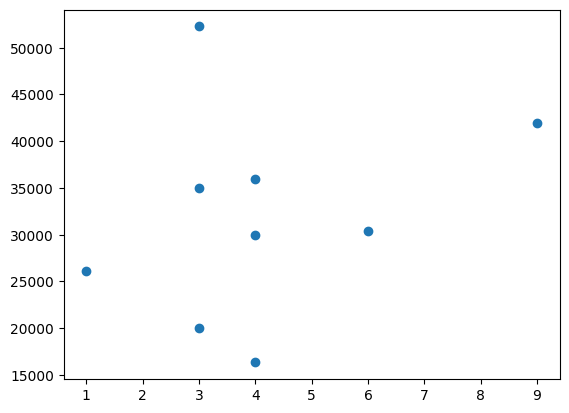

In [29]:
# higher-end
higher_end = df.loc[(df['total_sqft'] >= 15_000), ['total_sqft', 'bhk']]
plt.scatter(x=higher_end['bhk'], y=higher_end['total_sqft'])

In [30]:
df[(df['total_sqft'] > 4000)&(df['bhk'] <= 2)]

,location,total_sqft,price,bhk
1357,Amruthahalli,4400,475.0,2
4176,Ramesh Nagar,4200,160.0,2
7033,Yelahanka,26136,150.0,1
7586,Sector 1 HSR Layout,6000,276.0,1
9697,"Yelahanka,MVIT college",10030,150.0,1
11361,Kalyan nagar,8840,300.0,2
12024,Bommasandra Industrial Area,7000,135.0,2


In [31]:
# pruning-off all out-lying data
condition_lower = (df['total_sqft'] < 250) & (df['bhk'] > 1) # houses that are less than 250 sqft even though 2, 3 bhk
condition_extreme_lower = (df['total_sqft'] < 100)&(df['bhk'] == 1) # 1-bhk that are less than 100 sqft
bhk_1_2_higher = (df['total_sqft'] >= 4000)&(df['bhk'] <= 2) # 1, 2-bhk that are too high sqft
condition_upper = (df['total_sqft'] >= 15_000) # rare houses that are higher than 15,000 sqft


df_final = df[(~condition_upper) & (~bhk_1_2_higher) & (~condition_lower) & (~condition_extreme_lower)]

df_final.reset_index(drop=True, inplace=True)
print(df_final.shape)
df_final.head(3)

(12694, 4)


,location,total_sqft,price,bhk
0,Electronic City Phase II,1056,39.07,2
1,Chikka Tirupathi,2600,120.00,4
2,Uttarahalli,1440,62.00,3


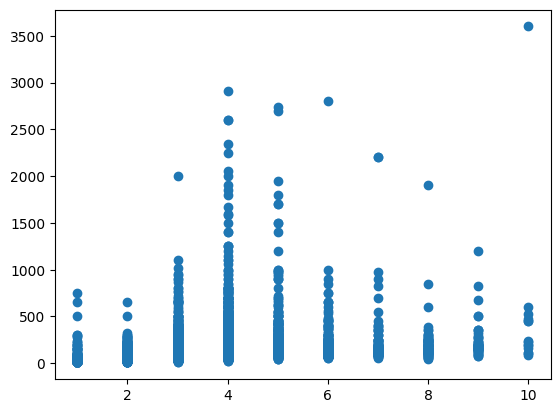

In [32]:
# handling outliers of price
plt.scatter(x=df_final['bhk'], y=df_final['price'])

In [33]:
price_bhk_3 = (df_final['bhk'] == 3) & (df_final['price'] > 1500) # 3-bhk with price higher than 15 lakh
price_bhk_5 = (df_final['bhk'] == 5) & (df_final['price'] > 2000) # 5-bhk with price higher than 20 lakh
price_bhk_6_10 = (df_final['bhk'] >= 6) & (df_final['price'] > 1000) # 6-bhk and higher with price higher than 10 lakh

In [34]:

df_all_final = df_final[(~price_bhk_3) & (~price_bhk_5) & (~price_bhk_6_10)]

df_all_final.reset_index(drop=True, inplace=True)
print(df_all_final.shape)
df_all_final.head(3)

(12685, 4)


,location,total_sqft,price,bhk
0,Electronic City Phase II,1056,39.07,2
1,Chikka Tirupathi,2600,120.00,4
2,Uttarahalli,1440,62.00,3


**Starting Analysis**

In [35]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import mean_absolute_error

# importing estimators
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [36]:
y = df_all_final.pop('price')
X = df_all_final

In [37]:
X.head(2)

,location,total_sqft,bhk
0,Electronic City Phase II,1056,2
1,Chikka Tirupathi,2600,4


In [38]:
cat_columns = X.select_dtypes('object').columns
num_columns = X.select_dtypes('number').columns

In [39]:
mms = MinMaxScaler()
num_columns_tr = mms.fit_transform(X.select_dtypes('number'))

In [40]:
full_pipeline = make_column_transformer((mms, num_columns),
                        (OneHotEncoder(handle_unknown='ignore', sparse=True), cat_columns))

In [41]:
features_prepared = full_pipeline.fit_transform(X)

c:\datascience2023\venvds2023\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
lin_scores = cross_val_score(estimator=LinearRegression(),
    X=features_prepared,
    y=y,
    scoring='neg_mean_absolute_error',
    cv=5)
np.mean(-lin_scores)

41.04242088261479

In [43]:
dt_scores = cross_val_score(estimator=DecisionTreeRegressor(),
    X=features_prepared,
    y=y,
    scoring='neg_mean_absolute_error',
    cv=5)
np.mean(-dt_scores)

33.853711845817664

In [44]:
"""
rf_scores = cross_val_score(estimator=RandomForestRegressor(),
    X=features_prepared,
    y=y,
    scoring='neg_mean_absolute_error',
    cv=5)
np.mean(-rf_scores)
"""

"\nrf_scores = cross_val_score(estimator=RandomForestRegressor(),\n    X=features_prepared,\n    y=y,\n    scoring='neg_mean_absolute_error',\n    cv=5)\nnp.mean(-rf_scores)\n"

In [45]:
# Random Forest Regressor turns out to be the best model

In [46]:
X_train = X.iloc[:12000]
y_train = y.iloc[:12000]
X_test = X.iloc[12000:]
y_test = y.iloc[12000:]

In [47]:
numerical_features = ['total_sqft', 'bhk']
numerical_transformer = MinMaxScaler()

categorical_features = ['location']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = make_column_transformer((numerical_transformer, numerical_features),
                        (categorical_transformer, categorical_features))

model_preprocessor = make_pipeline(preprocessor, RandomForestRegressor())

model_preprocessor.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['total_sqft', 'bhk']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [49]:
preds_model_preprocessor = model_preprocessor.predict(X_test)

In [50]:
answer_model_preprocessor = pd.DataFrame({'original': y_test, 'calculated': preds_model_preprocessor, 'difference': abs(y_test - preds_model_preprocessor)})
answer_model_preprocessor

,original,calculated,difference
12000,55.00,223.095333,168.095333
12001,33.00,53.544460,20.544460
12002,45.75,49.435360,3.685360
12003,40.00,37.266296,2.733704
12004,52.00,66.082017,14.082017
...,...,...,...
12680,112.00,114.140655,2.140655
12681,231.00,436.555000,205.555000
12682,400.00,408.130000,8.130000
12683,60.00,40.518201,19.481799


In [51]:
# testing one item
num = 1
one_item = X_test.iloc[num, :].to_frame().T

In [54]:
pred_num = model_preprocessor.predict(one_item)

In [55]:
print('item', one_item)
print()
print('actual', y[num])
pred_num

item       location total_sqft bhk
12001    Begur       1200   2

actual 120.0


array([53.54446028])

In [56]:
# Checking imaginary data
one_data = ['Chikkalasandra', 1000, 5]
book = {key:value for key, value in zip(['location', 'total_sqft', 'bhk'], one_data)}
one_frame = pd.DataFrame(book, index=[0])
one_frame

,location,total_sqft,bhk
0,Chikkalasandra,1000,5


In [57]:
model_preprocessor.predict(one_frame)

array([124.505])

In [58]:
# generated and moved to Django folder
# pickle.dump(model_preprocessor, open('Model_rfr_Bangalore2023.pkl', 'wb'))
# print('rfr done')